In [1]:
print("Hello")

Hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

In [3]:
df_train_titanic = pd.read_csv("train.csv")
df_train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train_titanic["Sex"] = df_train_titanic["Sex"].replace({"male": 1, "female": 0})

In [13]:
features = df_train_titanic[["Pclass", "Sex", "SibSp", "Age", "Parch"]]
y = df_train_titanic["Survived"]

In [25]:
mean_age = features["Age"].mean()
features.replace(np.nan, mean_age, inplace=True)

C:\Users\Aman's Laptop\AppData\Local\Temp\ipykernel_29916\422483143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.replace(np.nan, mean_age, inplace=True)


In [27]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=10)

logRe = LogisticRegression().fit(x_train, y_train)
yPreds = logRe.predict(x_test)

f1_score(y_test, yPreds)

0.736

Best F1 Score: 0.7027027027027026
F1 Score of Best Model: 0.7027027027027026


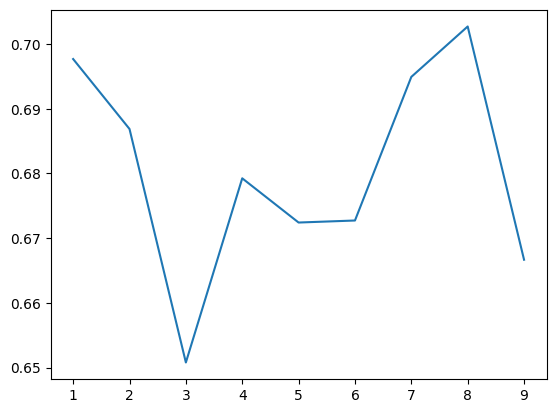

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

f1_scores = []
best_score = 0
best_model = None

for k in range(1, 10):
    kNearest = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    predictions = kNearest.predict(x_test)
    score = f1_score(y_test, predictions)
    f1_scores.append(score)

    if score > best_score:
        best_score = score
        best_model = kNearest

print("Best F1 Score:", best_score)
print("F1 Score of Best Model:", f1_score(y_test, best_model.predict(x_test)))

plt.plot(range(1, 10), f1_scores)



In [37]:
features.head()

,Pclass,Sex,SibSp,Age,Parch
0,3,1,1,22.0,0
1,1,0,1,38.0,0
2,3,0,0,26.0,0
3,1,0,1,35.0,0
4,3,1,0,35.0,0


In [47]:
from sklearn.tree import DecisionTreeClassifier


decTree = DecisionTreeClassifier(criterion="gini").fit(x_train, y_train)
predictions = decTree.predict(x_test)
print(f1_score(y_test, predictions))

0.7479674796747967


In [62]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:

test_df["Sex"] = test_df["Sex"].replace({"male": 1, "female": 0})
test_df["Age"].replace(np.nan, mean_age, inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
test_df.shape

(891, 12)

In [64]:
predictions = decTree.predict(test_df[["Pclass", "Sex", "SibSp", "Age", "Parch"]])

In [65]:
output = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': predictions})
output.to_csv('submission.csv', index=False)

<Axes: xlabel='Age', ylabel='Fare'>

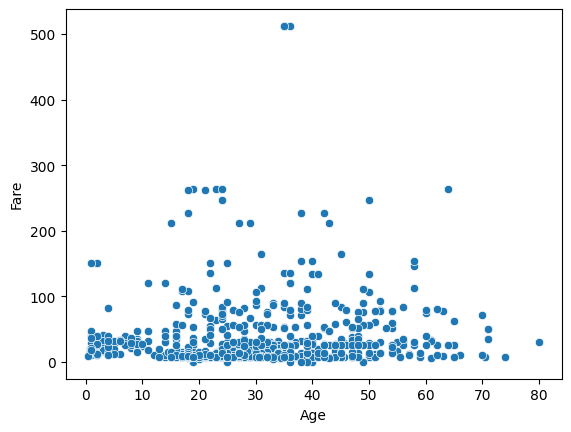

In [46]:
import seaborn as sns
sns.scatterplot(x="Age", y="Fare", data=df_train_titanic)